In [1]:
import numpy as np
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [2]:
data_dir = os.path.join('drive', 'MyDrive', 'data')

##CREATE DATASET MANUALLY

In [3]:
labels = ['not_ripples', 'transition', 'ripples']
img_size = 100
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Dataset for first classification

In [ ]:
train = get_data(os.path.join(data_dir, 'Lines_for_train', '20x20', 'Lineas_Sonarwiz', 'train'))
val = get_data(os.path.join(data_dir, 'Lines_for_train', '20x20', 'Lineas_Sonarwiz', 'test'))

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train)
x_val = np.array(x_val)

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train, test_size=0.3)
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)

Dataset for fourier classification

In [ ]:
train_FT = get_data(os.path.join(data_dir, 'Lines_for_train', '20x20', 'Lineas_Sonarwiz', 'ft', 'train'))
val_FT = get_data(os.path.join(data_dir, 'Lines_for_train', '20x20', 'Lineas_Sonarwiz', 'ft', 'test'))

<ipython-input-3-2c2802813d4f>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
x_train_FT = []
y_train_FT = []
x_val_FT = []
y_val_FT = []

for feature, label in train_FT:
  x_train_FT.append(feature)
  y_train_FT.append(label)

for feature, label in val_FT:
  x_val_FT.append(feature)
  y_val_FT.append(label)

# Normalize the data
x_train_FT = np.array(x_train_FT)
x_val_FT = np.array(x_val_FT)

x_train_FT.reshape(-1, img_size, img_size, 1)
y_train_FT = np.array(y_train_FT)

x_val_FT.reshape(-1, img_size, img_size, 1)
y_val_FT = np.array(y_val_FT)

In [ ]:
x_train_FT,x_val_FT,y_train_FT,y_val_FT=train_test_split(x_train_FT,y_train_FT, test_size=0.3)
y_train_FT=to_categorical(y_train_FT)
y_val_FT=to_categorical(y_val_FT)

In [ ]:
train_generator = image.ImageDataGenerator(rotation_range=2, horizontal_flip=True, vertical_flip=True)
val_generator = image.ImageDataGenerator(rotation_range=2, horizontal_flip=True, vertical_flip=True)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train_FT)
val_generator.fit(x_val_FT)

Dataset for Surface Roughness classification

In [5]:
train_SR = get_data(os.path.join(data_dir, 'Lines_for_train', '20x20', 'Lineas_Sonarwiz', 'attribute', 'train'))
val_SR = get_data(os.path.join(data_dir, 'Lines_for_train', '20x20', 'Lineas_Sonarwiz', 'attribute', 'test'))

<ipython-input-3-2c2802813d4f>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [6]:
x_train_SR = []
y_train_SR = []
x_val_SR = []
y_val_SR = []

for feature, label in train_SR:
  x_train_SR.append(feature)
  y_train_SR.append(label)

for feature, label in val_SR:
  x_val_SR.append(feature)
  y_val_SR.append(label)

# Normalize the data
x_train_SR = np.array(x_train_SR)
x_val_SR = np.array(x_val_SR)

x_train_SR.reshape(-1, img_size, img_size, 1)
y_train_SR = np.array(y_train_SR)

x_val_SR.reshape(-1, img_size, img_size, 1)
y_val_SR = np.array(y_val_SR)

In [7]:
x_train_SR,x_val_SR,y_train_SR,y_val_SR=train_test_split(x_train_SR,y_train_SR, test_size=0.3)
y_train_SR=to_categorical(y_train_SR)
y_val_SR=to_categorical(y_val_SR)

##CREATING FOLDER FOR LOGS

In [8]:
logdir= os.path.join(data_dir, 'logs')

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

##USING EXISTING NEURAL NETWORK MODELS

In [9]:
from tensorflow.keras.applications import ResNet50, efficientnet_v2, VGG16, DenseNet121

In [31]:
# Initialize the Pretrained Model
#--------------------ResNet50-------------------
ResNet50_feature_extractor_20by20 = ResNet50(weights='imagenet', input_shape=(100, 100, 3), include_top=False)
#----------------EfficientNetV2S----------------
ENV2S_feature_extractor_20by20 = efficientnet_v2.EfficientNetV2S(weights='imagenet', input_shape=(100, 100, 3), include_top=False, include_preprocessing=True)
#---------------------VGG16---------------------
VGG16_feature_extractor_20by20 = VGG16(weights='imagenet', input_shape=(100, 100, 3), include_top=False)
#------------------DenseNet121------------------
DenseNet121_feature_extractor_20by20 = DenseNet121(weights='imagenet', input_shape=(100, 100, 3), include_top=False)

In [32]:
# Set this parameter to make sure it's not being trained
#--------------------ResNet50-------------------
ResNet50_feature_extractor_20by20.trainable = False
#----------------EfficientNetV2S----------------
ENV2S_feature_extractor_20by20.trainable = False
#---------------------VGG16---------------------
VGG16_feature_extractor_20by20.trainable = False
#------------------DenseNet121------------------
DenseNet121_feature_extractor_20by20.trainable = False

# Set the input layer
#--------------------ResNet50-------------------
ResNet50_input20by20_ = tf.keras.Input(shape=(100, 100, 3))
#----------------EfficientNetV2S----------------
ENV2S_input20by20_ = tf.keras.Input(shape=(100, 100, 3))
#---------------------VGG16---------------------
VGG16_input20by20_ = tf.keras.Input(shape=(100, 100, 3))
#------------------DenseNet121------------------
DenseNet121_input20by20_ = tf.keras.Input(shape=(100, 100, 3))

# Set the feature extractor layer
#--------------------ResNet50-------------------
ResNet50_x20by20 = ResNet50_feature_extractor_20by20(ResNet50_input20by20_, training=False)
#----------------EfficientNetV2S----------------
ENV2S_x20by20 = ENV2S_feature_extractor_20by20(ENV2S_input20by20_, training=False)
#---------------------VGG16---------------------
VGG16_x20by20 = VGG16_feature_extractor_20by20(VGG16_input20by20_, training=False)
#------------------DenseNet121------------------
DenseNet121_x20by20 = DenseNet121_feature_extractor_20by20(DenseNet121_input20by20_, training=False)

# Set the pooling layer for FOURIER TRANSFORM
#----------------EfficientNetV2S----------------
ENV2S_x20by20_FT = tf.keras.layers.GlobalAveragePooling2D()(ENV2S_x20by20)
#------------------DenseNet121------------------
DenseNet121_x20by20_SR = tf.keras.layers.GlobalAveragePooling2D()(DenseNet121_x20by20)

# Set the pooling layer
#--------------------ResNet50-------------------
ResNet50_x20by20 = tf.keras.layers.GlobalAveragePooling2D()(ResNet50_x20by20)
#----------------EfficientNetV2S----------------
ENV2S_x20by20 = tf.keras.layers.GlobalAveragePooling2D()(ENV2S_x20by20)
#---------------------VGG16---------------------
VGG16_x20by20 = tf.keras.layers.GlobalAveragePooling2D()(VGG16_x20by20)
#------------------DenseNet121------------------
DenseNet121_x20by20 = tf.keras.layers.GlobalAveragePooling2D()(DenseNet121_x20by20)

# Set the sigmoid activation function layer
#--------------------ResNet50-------------------
#ResNet50_x20by20 = tf.keras.layers.Dense(3, activation='relu')(ResNet50_x20by20)
#----------------EfficientNetV2S----------------
#ENV2S_output20by20_ = tf.keras.layers.Dense(3, activation='relu')(ENV2S_x20by20)
#---------------------VGG16---------------------
#VGG16_output20by20_ = tf.keras.layers.Dense(3, activation='relu')(VGG16_x20by20)
#------------------DenseNet121------------------
#DenseNet121_output20by20_ = tf.keras.layers.Dense(3, activation='relu')(DenseNet121_x20by20)

# Set layer with dropout rate function
#--------------------ResNet50-------------------
ResNet50_x20by20 = tf.keras.layers.Dropout(0.2)(ResNet50_x20by20)
#----------------EfficientNetV2S----------------
ENV2S_x20by20 = tf.keras.layers.Dropout(0.2)(ENV2S_x20by20)
#---------------------VGG16---------------------
VGG16_x20by20 = tf.keras.layers.Dropout(0.2)(VGG16_x20by20)
#------------------DenseNet121------------------
DenseNet121_x20by20 = tf.keras.layers.Dropout(0.2)(DenseNet121_x20by20)

# Set layer with dropout rate function for FOURIER TRANSFORM
#----------------EfficientNetV2S----------------
#ENV2S_x20by20_FT = tf.keras.layers.Dropout(0.5)(ENV2S_x20by20_FT)


# Set first dense layer with sigmoid activation function
#--------------------ResNet50-------------------
ResNet50_x20by20 = tf.keras.layers.Dense(50, activation='sigmoid')(ResNet50_x20by20)
#----------------EfficientNetV2S----------------
ENV2S_x20by20 = tf.keras.layers.Dense(50, activation='sigmoid')(ENV2S_x20by20)
#---------------------VGG16---------------------
VGG16_x20by20 = tf.keras.layers.Dense(50, activation='sigmoid')(VGG16_x20by20)
#------------------DenseNet121------------------
DenseNet121_x20by20 = tf.keras.layers.Dense(50, activation='sigmoid')(DenseNet121_x20by20)


# Set first dense layer with sigmoid activation function FOR FOURIER TRANSFORM
#----------------EfficientNetV2S----------------
ENV2S_x20by20_FT = tf.keras.layers.Dense(50, activation='sigmoid')(ENV2S_x20by20_FT)
# Set the final layer with sigmoid activation function FOR SURFACE ROUGHNESS
#------------------DenseNet121------------------
DenseNet121_x20by20_SR = tf.keras.layers.Dense(50, activation='sigmoid')(DenseNet121_x20by20_SR)

# Set the final layer with sigmoid activation function
#--------------------ResNet50-------------------
ResNet50_output20by20_ = tf.keras.layers.Dense(3, activation='softmax')(ResNet50_x20by20)
#----------------EfficientNetV2S----------------
ENV2S_output20by20_ = tf.keras.layers.Dense(3, activation='softmax')(ENV2S_x20by20)
#---------------------VGG16---------------------
VGG16_output20by20_ = tf.keras.layers.Dense(3, activation='softmax')(VGG16_x20by20)
#------------------DenseNet121------------------
DenseNet121_output20by20_ = tf.keras.layers.Dense(3, activation='softmax')(DenseNet121_x20by20)


# Set the final layer with sigmoid activation function FOR FOURIER TRANSFORM
#----------------EfficientNetV2S----------------
ENV2S_output20by20_FT = tf.keras.layers.Dense(3, activation='softmax')(ENV2S_x20by20_FT)
# Set the final layer with sigmoid activation function FOR SURFACE ROUGHNESS
#------------------DenseNet121------------------
DenseNet121_output20by20_SR = tf.keras.layers.Dense(3, activation='softmax')(DenseNet121_x20by20_SR)

In [33]:
# Create the new model object
#--------------------ResNet50-------------------
ResNet50_model_20by20 = tf.keras.Model(ResNet50_input20by20_, ResNet50_output20by20_)
#----------------EfficientNetV2S----------------
ENV2S_model_20by20 = tf.keras.Model(ENV2S_input20by20_, ENV2S_output20by20_)
#---------------------VGG16---------------------
VGG16_model_20by20 = tf.keras.Model(VGG16_input20by20_, VGG16_output20by20_)
#------------------DenseNet121------------------
DenseNet121_model_20by20 = tf.keras.Model(DenseNet121_input20by20_, DenseNet121_output20by20_)

#FOURIER CLASSIFICATION
#----------------EfficientNetV2S----------------
ENV2S_model_20by20_FT = tf.keras.Model(ENV2S_input20by20_, ENV2S_output20by20_FT)

#SURFACE ROUGHNESS CLASSIFICATION
#------------------DenseNet121------------------
DenseNet121_model_20by20_SR = tf.keras.Model(DenseNet121_input20by20_, DenseNet121_output20by20_SR)

In [34]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt_ENV2S = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
opt_VGG16 = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
opt_DenseNet121 = tf.keras.optimizers.legacy.Adam(learning_rate=0.0002)
opt_DenseNet121_SR = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
opt_ENV2S_FT = tf.keras.optimizers.legacy.Adam(learning_rate=0.1)
# Compile it
#--------------------ResNet50-------------------
ResNet50_model_20by20.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#----------------EfficientNetV2S----------------
ENV2S_model_20by20.compile(optimizer=opt_ENV2S, loss='categorical_crossentropy', metrics=['accuracy'])
#---------------------VGG16---------------------
VGG16_model_20by20.compile(optimizer=opt_VGG16, loss='categorical_crossentropy', metrics=['accuracy'])
#------------------DenseNet121------------------
DenseNet121_model_20by20.compile(optimizer=opt_DenseNet121, loss='categorical_crossentropy', metrics=['accuracy'])

#FOURIER CLASSIFICATION
#----------------EfficientNetV2S----------------
ENV2S_model_20by20_FT.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

#SURFACE ROUGHNESS CLASSIFICATION
#------------------DenseNet121------------------
DenseNet121_model_20by20_SR.compile(optimizer=opt_DenseNet121_SR, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01,  patience=3, min_lr=1e-7)

In [ ]:
ENV2S_model_20by20.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 efficientnetv2-s (Function  (None, 4, 4, 1280)        20331360  
 al)                                                             
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 50)                64050     
                                                                 
 dense_7 (Dense)             (None, 3)                 153 

#--------------------------------TRAINING MODEL FOR FIRST CLASSIFICATION--------------------------------

##TRAINING AND SAVING RESNET50 MODEL

In [ ]:
hist_ResNet50_20by20 = ResNet50_model_20by20.fit(x_train,y_train, epochs=75, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/75
52/52 [==============================] - 15s 84ms/step - loss: 0.6202 - accuracy: 0.8419 - val_loss: 0.4418 - val_accuracy: 0.8867
Epoch 2/75
52/52 [==============================] - 2s 40ms/step - loss: 0.3749 - accuracy: 0.9046 - val_loss: 0.3538 - val_accuracy: 0.8895
Epoch 3/75
52/52 [==============================] - 2s 43ms/step - loss: 0.3093 - accuracy: 0.9125 - val_loss: 0.3144 - val_accuracy: 0.8966
Epoch 4/75
52/52 [==============================] - 2s 44ms/step - loss: 0.2741 - accuracy: 0.9100 - val_loss: 0.2850 - val_accuracy: 0.9008
Epoch 5/75
52/52 [==============================] - 2s 41ms/step - loss: 0.2493 - accuracy: 0.9167 - val_loss: 0.2700 - val_accuracy: 0.9037
Epoch 6/75
52/52 [==============================] - 2s 42ms/step - loss: 0.2326 - accuracy: 0.9240 - val_loss: 0.2541 - val_accuracy: 0.9065
Epoch 7/75
52/52 [==============================] - 2s 41ms/step - loss: 0.2140 - accuracy: 0.9271 - val_loss: 0.2389 - val_accuracy: 0.9164
Epoch 8/75
5

In [ ]:
ResNet50_model_20by20.save(os.path.join(data_dir,'imageclassifier_3classes_ResNet50_20x20_70epoch_newtransitiontiles.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


events.out.tfevents.1696451244.f4594d2558b1.942.2.v2 - ResNet50 new transition tiles - 75 epochs

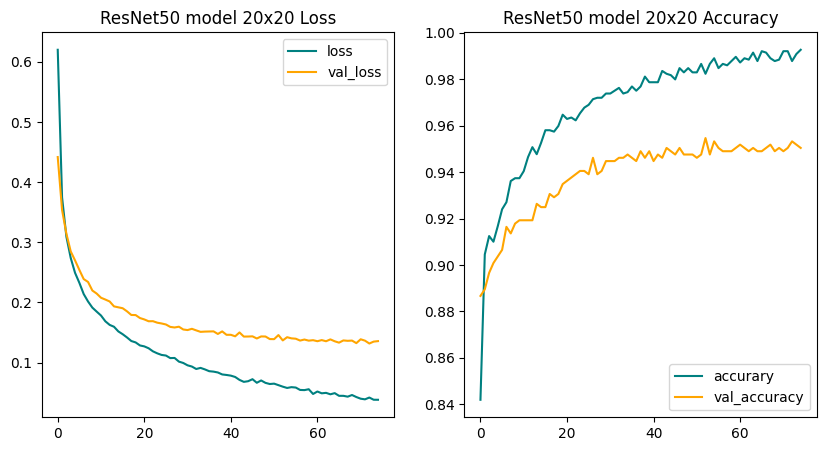

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_ResNet50_20by20.history['loss'], color='teal', label='loss')
ax[0].plot(hist_ResNet50_20by20.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('ResNet50 model 20x20 Loss')
ax[0].legend(loc="upper right")
#ax[0].set_ylim([0, 1])

ax[1].plot(hist_ResNet50_20by20.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_ResNet50_20by20.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('ResNet50 model 20x20 Accuracy')
ax[1].legend(loc="lower right")
#ax[1].set_ylim([0.5, 1])

##TRAINING AND SAVING ENV2S MODEL

In [ ]:
hist_ENV2S_20by20 = ENV2S_model_20by20.fit(x_train,y_train, epochs=200, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/200
55/55 [==============================] - 21s 132ms/step - loss: 0.9975 - accuracy: 0.4891 - val_loss: 0.8694 - val_accuracy: 0.5646
Epoch 2/200
55/55 [==============================] - 3s 57ms/step - loss: 0.7944 - accuracy: 0.6520 - val_loss: 0.7597 - val_accuracy: 0.7457
Epoch 3/200
55/55 [==============================] - 4s 68ms/step - loss: 0.7010 - accuracy: 0.7869 - val_loss: 0.6827 - val_accuracy: 0.7963
Epoch 4/200
55/55 [==============================] - 4s 64ms/step - loss: 0.6294 - accuracy: 0.8160 - val_loss: 0.6217 - val_accuracy: 0.8109
Epoch 5/200
55/55 [==============================] - 3s 58ms/step - loss: 0.5771 - accuracy: 0.8331 - val_loss: 0.5765 - val_accuracy: 0.8162
Epoch 6/200
55/55 [==============================] - 3s 57ms/step - loss: 0.5329 - accuracy: 0.8417 - val_loss: 0.5388 - val_accuracy: 0.8336
Epoch 7/200
55/55 [==============================] - 4s 67ms/step - loss: 0.4972 - accuracy: 0.8531 - val_loss: 0.5095 - val_accuracy: 0.8362
Epoc

events.out.tfevents.1696452524.f4594d2558b1.942.4.v2 - ENV2S new transition tiles - 200 epochs

In [ ]:
ENV2S_model_20by20.save(os.path.join(data_dir,'imageclassifier_3classes_ENV2S_20x20_200epoch_V2_newtransitiontiles.h5'))

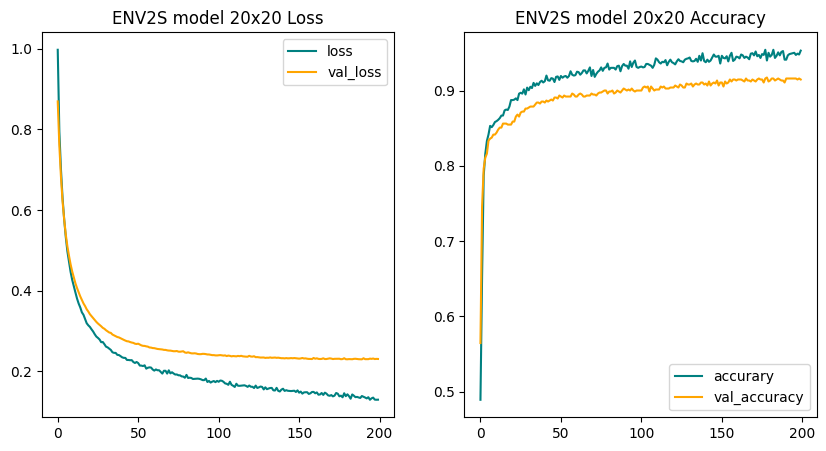

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_ENV2S_20by20.history['loss'], color='teal', label='loss')
ax[0].plot(hist_ENV2S_20by20.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('ENV2S model 20x20 Loss')
ax[0].legend(loc="upper right")
#ax[0].set_ylim([0, 1])

ax[1].plot(hist_ENV2S_20by20.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_ENV2S_20by20.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('ENV2S model 20x20 Accuracy')
ax[1].legend(loc="lower right")
#ax[1].set_ylim([0.5, 1])

##TRAINING AND SAVING VGG-16 MODEL

In [ ]:
hist_VGG16_20by20 = VGG16_model_20by20.fit(x_train,y_train, epochs=200, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/200
52/52 [==============================] - 6s 79ms/step - loss: 1.1630 - accuracy: 0.4292 - val_loss: 0.7377 - val_accuracy: 0.7819
Epoch 2/200
52/52 [==============================] - 3s 58ms/step - loss: 0.6845 - accuracy: 0.7739 - val_loss: 0.5121 - val_accuracy: 0.8584
Epoch 3/200
52/52 [==============================] - 3s 58ms/step - loss: 0.5130 - accuracy: 0.8626 - val_loss: 0.4249 - val_accuracy: 0.8782
Epoch 4/200
52/52 [==============================] - 2s 47ms/step - loss: 0.4380 - accuracy: 0.8809 - val_loss: 0.3794 - val_accuracy: 0.8881
Epoch 5/200
52/52 [==============================] - 3s 58ms/step - loss: 0.3891 - accuracy: 0.8894 - val_loss: 0.3512 - val_accuracy: 0.8938
Epoch 6/200
52/52 [==============================] - 2s 48ms/step - loss: 0.3542 - accuracy: 0.8967 - val_loss: 0.3312 - val_accuracy: 0.8952
Epoch 7/200
52/52 [==============================] - 2s 47ms/step - loss: 0.3334 - accuracy: 0.9003 - val_loss: 0.3167 - val_accuracy: 0.8966
Epoch 

events.out.tfevents.1696453429.f4594d2558b1.942.6.v2 - VGG16 new transition tiles - 200 epochs

In [ ]:
VGG16_model_20by20.save(os.path.join(data_dir,'imageclassifier_3classes_VGG16_20x20_200epoch_V2_newtransitiontiles.h5'))

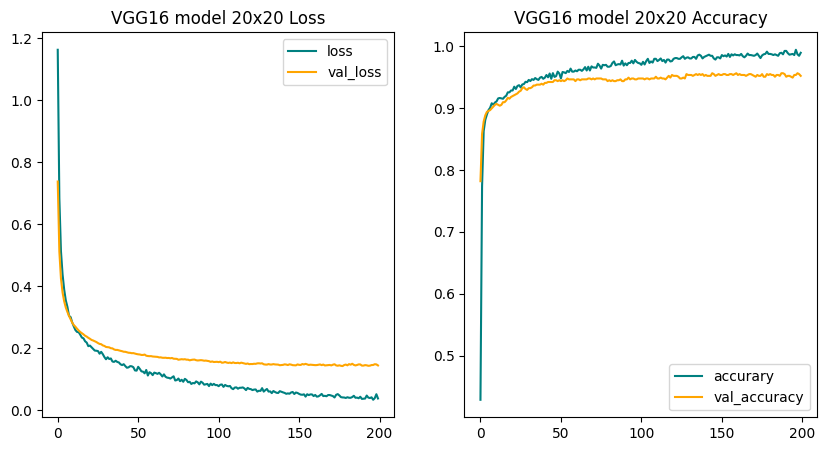

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_VGG16_20by20.history['loss'], color='teal', label='loss')
ax[0].plot(hist_VGG16_20by20.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('VGG16 model 20x20 Loss')
ax[0].legend(loc="upper right")
#ax[0].set_ylim([0, 1])

ax[1].plot(hist_VGG16_20by20.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_VGG16_20by20.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('VGG16 model 20x20 Accuracy')
ax[1].legend(loc="lower right")
#ax[1].set_ylim([0.5, 1])

##TRAINING AND SAVING DENSETNET121 MODEL

In [ ]:
hist_DenseNet121_20by20 = DenseNet121_model_20by20.fit(x_train,y_train, epochs=200, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/200
55/55 [==============================] - 16s 134ms/step - loss: 0.8889 - accuracy: 0.6023 - val_loss: 0.6525 - val_accuracy: 0.7430
Epoch 2/200
55/55 [==============================] - 2s 40ms/step - loss: 0.6587 - accuracy: 0.7377 - val_loss: 0.5426 - val_accuracy: 0.7963
Epoch 3/200
55/55 [==============================] - 2s 41ms/step - loss: 0.5842 - accuracy: 0.7754 - val_loss: 0.5086 - val_accuracy: 0.8043
Epoch 4/200
55/55 [==============================] - 2s 36ms/step - loss: 0.5483 - accuracy: 0.7920 - val_loss: 0.4854 - val_accuracy: 0.8043
Epoch 5/200
55/55 [==============================] - 2s 38ms/step - loss: 0.5196 - accuracy: 0.7869 - val_loss: 0.4810 - val_accuracy: 0.8029
Epoch 6/200
55/55 [==============================] - 2s 39ms/step - loss: 0.5016 - accuracy: 0.7937 - val_loss: 0.4824 - val_accuracy: 0.8043
Epoch 7/200
55/55 [==============================] - 2s 39ms/step - loss: 0.4890 - accuracy: 0.7954 - val_loss: 0.4609 - val_accuracy: 0.8096
Epoc

events.out.tfevents.1696454172.f4594d2558b1.942.8.v2 - DenseNet121 new transition tiles - 200 epochs

In [ ]:
DenseNet121_model_20by20.save(os.path.join(data_dir,'imageclassifier_3classes_DenseNet121_20x20_200epoch_newtransitiontiles.h5'))

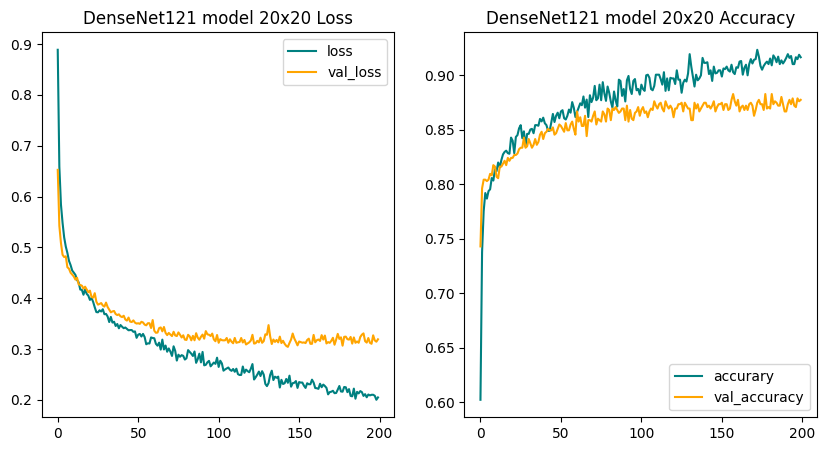

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_DenseNet121_20by20.history['loss'], color='teal', label='loss')
ax[0].plot(hist_DenseNet121_20by20.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('DenseNet121 model 20x20 Loss')
ax[0].legend(loc="upper right")
#ax[0].set_ylim([0, 10])

ax[1].plot(hist_DenseNet121_20by20.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_DenseNet121_20by20.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('DenseNet121 model 20x20 Accuracy')
ax[1].legend(loc="lower right")
#ax[1].set_ylim([0.5, 1])

#------------------------------TRAINING MODEL FOR FOURIER CLASSIFICATION------------------------------

##TRAINING AND SAVING RESNET50 MODEL FOR FOURIER CLASSIFICATION

In [ ]:
pretrained_model = tf.keras.applications.resnet50.ResNet50(
                    input_shape=(100, 100, 3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg')

pretrained_model.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(50, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 106, 106, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 50, 50, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 50, 50, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
history = model.fit(x_train_FT,y_train_FT,validation_data=(x_val_FT, y_val_FT),epochs=250,
    callbacks=[callbacks])

Epoch 1/250
5/5 [==============================] - 16s 2s/step - loss: 1.2578 - accuracy: 0.4106 - val_loss: 0.8906 - val_accuracy: 0.6154
Epoch 2/250
5/5 [==============================] - 13s 3s/step - loss: 0.8148 - accuracy: 0.6358 - val_loss: 0.7726 - val_accuracy: 0.7077
Epoch 3/250
5/5 [==============================] - 11s 2s/step - loss: 0.6449 - accuracy: 0.7219 - val_loss: 0.5296 - val_accuracy: 0.8308
Epoch 4/250
5/5 [==============================] - 11s 2s/step - loss: 0.4961 - accuracy: 0.8146 - val_loss: 0.4466 - val_accuracy: 0.8462
Epoch 5/250
5/5 [==============================] - 11s 2s/step - loss: 0.4323 - accuracy: 0.8675 - val_loss: 0.3946 - val_accuracy: 0.8615
Epoch 6/250
5/5 [==============================] - 9s 2s/step - loss: 0.3520 - accuracy: 0.8874 - val_loss: 0.4342 - val_accuracy: 0.8308
Epoch 7/250
5/5 [==============================] - 11s 2s/step - loss: 0.3733 - accuracy: 0.8344 - val_loss: 0.4480 - val_accuracy: 0.7692
Epoch 8/250
5/5 [===========

In [ ]:
model.save(os.path.join(data_dir,'imageclassifier_3classes_model_20x20_70epoch_FT.h5'))

##TRAINING AND SAVING ENV2S MODEL FOR FOURIER CLASSIFICATION

In [ ]:
hist_ENV2S_20by20_FT = ENV2S_model_20by20_FT.fit(train_generator.flow(x_train_FT, y_train_FT), epochs=200,
                                                 validation_data=val_generator.flow(x_val_FT, y_val_FT), callbacks = [tensorboard_callback], verbose = 1)

Epoch 1/200
5/5 [==============================] - 21s 1s/step - loss: 1.1356 - accuracy: 0.3311 - val_loss: 0.9600 - val_accuracy: 0.5692
Epoch 2/200
5/5 [==============================] - 1s 159ms/step - loss: 0.9982 - accuracy: 0.4636 - val_loss: 0.9326 - val_accuracy: 0.6000
Epoch 3/200
5/5 [==============================] - 1s 251ms/step - loss: 0.9110 - accuracy: 0.5695 - val_loss: 0.9233 - val_accuracy: 0.6462
Epoch 4/200
5/5 [==============================] - 1s 266ms/step - loss: 0.8572 - accuracy: 0.6490 - val_loss: 0.9393 - val_accuracy: 0.6000
Epoch 5/200
5/5 [==============================] - 1s 262ms/step - loss: 0.8222 - accuracy: 0.6623 - val_loss: 0.8821 - val_accuracy: 0.6154
Epoch 6/200
5/5 [==============================] - 1s 209ms/step - loss: 0.7891 - accuracy: 0.6358 - val_loss: 0.8536 - val_accuracy: 0.6308
Epoch 7/200
5/5 [==============================] - 1s 169ms/step - loss: 0.7669 - accuracy: 0.6424 - val_loss: 0.8460 - val_accuracy: 0.6154
Epoch 8/200
5/5

In [ ]:
ENV2S_model_20by20_FT.save(os.path.join(data_dir,'imageclassifier_3classes_ENV2S_20x20_200epoch_FT.h5'))

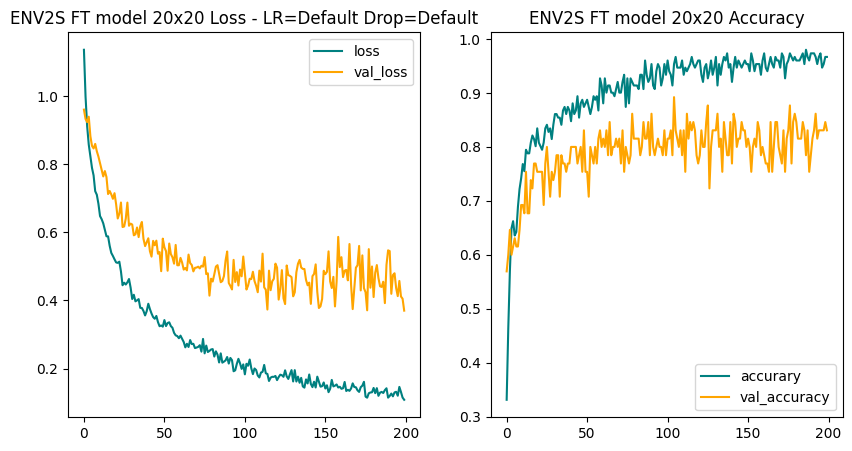

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_ENV2S_20by20_FT.history['loss'], color='teal', label='loss')
ax[0].plot(hist_ENV2S_20by20_FT.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('ENV2S FT model 20x20 Loss - LR=Default Drop=Default')
ax[0].legend(loc="upper right")
#ax[0].set_ylim([0, 1])

ax[1].plot(hist_ENV2S_20by20_FT.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_ENV2S_20by20_FT.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('ENV2S FT model 20x20 Accuracy')
ax[1].legend(loc="lower right")
#ax[1].set_ylim([0.5, 1])

#-------------------TRAINING MODEL FOR SURFACE ROUGHNESS CLASSIFICATION-------------------

##TRAINING AND SAVING DENSENET121 MODEL FOR SR CLASSIFICATION

In [ ]:
hist_DenseNet121_20by20_SR = DenseNet121_model_20by20_SR.fit(x_train_SR,y_train_SR, epochs=120, validation_data=(x_val_SR, y_val_SR), callbacks=[tensorboard_callback])

Epoch 1/120
16/16 [==============================] - 11s 182ms/step - loss: 0.9675 - accuracy: 0.5186 - val_loss: 0.8303 - val_accuracy: 0.5865
Epoch 2/120
16/16 [==============================] - 1s 50ms/step - loss: 0.7216 - accuracy: 0.6963 - val_loss: 0.7082 - val_accuracy: 0.7308
Epoch 3/120
16/16 [==============================] - 1s 38ms/step - loss: 0.6378 - accuracy: 0.7645 - val_loss: 0.6491 - val_accuracy: 0.7404
Epoch 4/120
16/16 [==============================] - 1s 47ms/step - loss: 0.5866 - accuracy: 0.7851 - val_loss: 0.6078 - val_accuracy: 0.7644
Epoch 5/120
16/16 [==============================] - 1s 48ms/step - loss: 0.5468 - accuracy: 0.8202 - val_loss: 0.5845 - val_accuracy: 0.7548
Epoch 6/120
16/16 [==============================] - 1s 63ms/step - loss: 0.5170 - accuracy: 0.8264 - val_loss: 0.5713 - val_accuracy: 0.7596
Epoch 7/120
16/16 [==============================] - 1s 65ms/step - loss: 0.4959 - accuracy: 0.8244 - val_loss: 0.5586 - val_accuracy: 0.7596
Epoc

In [ ]:
DenseNet121_model_20by20_SR.save(os.path.join(data_dir,'imageclassifier_3classes_DenseNet121_20x20_120epoch_SR_V2.h5'))

In [35]:
hist_ResNet50_20by20_SR = ResNet50_model_20by20.fit(x_train_SR,y_train_SR, epochs=80, validation_data=(x_val_SR, y_val_SR), callbacks=[tensorboard_callback])

Epoch 1/80
16/16 [==============================] - 6s 129ms/step - loss: 0.9627 - accuracy: 0.5599 - val_loss: 0.7620 - val_accuracy: 0.6731
Epoch 2/80
16/16 [==============================] - 1s 44ms/step - loss: 0.8066 - accuracy: 0.6880 - val_loss: 0.6664 - val_accuracy: 0.8173
Epoch 3/80
16/16 [==============================] - 1s 44ms/step - loss: 0.7241 - accuracy: 0.7479 - val_loss: 0.5951 - val_accuracy: 0.8269
Epoch 4/80
16/16 [==============================] - 1s 52ms/step - loss: 0.6717 - accuracy: 0.7645 - val_loss: 0.5434 - val_accuracy: 0.8221
Epoch 5/80
16/16 [==============================] - 1s 55ms/step - loss: 0.6190 - accuracy: 0.7727 - val_loss: 0.5132 - val_accuracy: 0.8269
Epoch 6/80
16/16 [==============================] - 1s 50ms/step - loss: 0.5883 - accuracy: 0.8058 - val_loss: 0.4827 - val_accuracy: 0.8462
Epoch 7/80
16/16 [==============================] - 1s 56ms/step - loss: 0.5561 - accuracy: 0.7955 - val_loss: 0.4582 - val_accuracy: 0.8413
Epoch 8/80
1

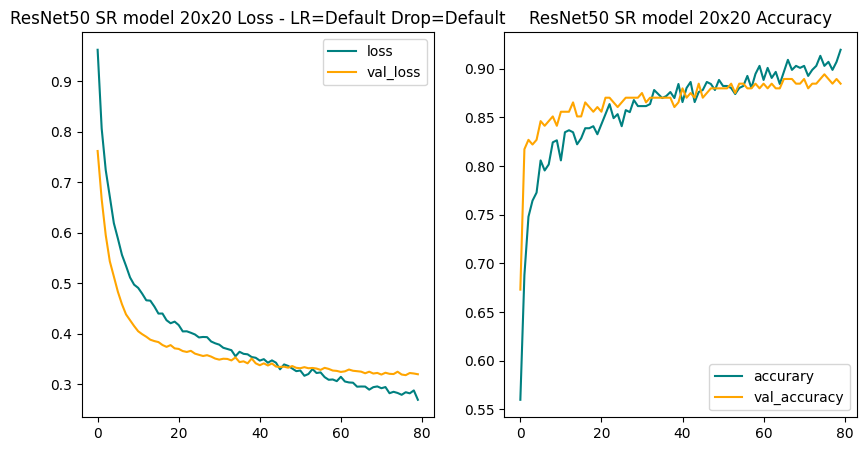

In [36]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_ResNet50_20by20_SR.history['loss'], color='teal', label='loss')
ax[0].plot(hist_ResNet50_20by20_SR.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('ResNet50 SR model 20x20 Loss - LR=Default Drop=Default')
ax[0].legend(loc="upper right")
#ax[0].set_ylim([0, 1])

ax[1].plot(hist_ResNet50_20by20_SR.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_ResNet50_20by20_SR.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('ResNet50 SR model 20x20 Accuracy')
ax[1].legend(loc="lower right")
#ax[1].set_ylim([0.5, 1])

In [37]:
ResNet50_model_20by20.save(os.path.join(data_dir,'imageclassifier_3classes_ResNet50_20x20_80epoch_SR.h5'))

In [17]:
hist_VGG16_20by20_SR = VGG16_model_20by20.fit(x_train_SR,y_train_SR, epochs=200, validation_data=(x_val_SR, y_val_SR), callbacks=[tensorboard_callback])

Epoch 1/200
16/16 [==============================] - 5s 158ms/step - loss: 1.3216 - accuracy: 0.2603 - val_loss: 1.1939 - val_accuracy: 0.4183
Epoch 2/200
16/16 [==============================] - 1s 45ms/step - loss: 1.1811 - accuracy: 0.4318 - val_loss: 1.0353 - val_accuracy: 0.6058
Epoch 3/200
16/16 [==============================] - 1s 45ms/step - loss: 1.0772 - accuracy: 0.5496 - val_loss: 0.9282 - val_accuracy: 0.6538
Epoch 4/200
16/16 [==============================] - 1s 52ms/step - loss: 0.9707 - accuracy: 0.6054 - val_loss: 0.8530 - val_accuracy: 0.6731
Epoch 5/200
16/16 [==============================] - 1s 45ms/step - loss: 0.9343 - accuracy: 0.6426 - val_loss: 0.7994 - val_accuracy: 0.7019
Epoch 6/200
16/16 [==============================] - 1s 52ms/step - loss: 0.8950 - accuracy: 0.6426 - val_loss: 0.7565 - val_accuracy: 0.7308
Epoch 7/200
16/16 [==============================] - 1s 45ms/step - loss: 0.8612 - accuracy: 0.6550 - val_loss: 0.7225 - val_accuracy: 0.7404
Epoch

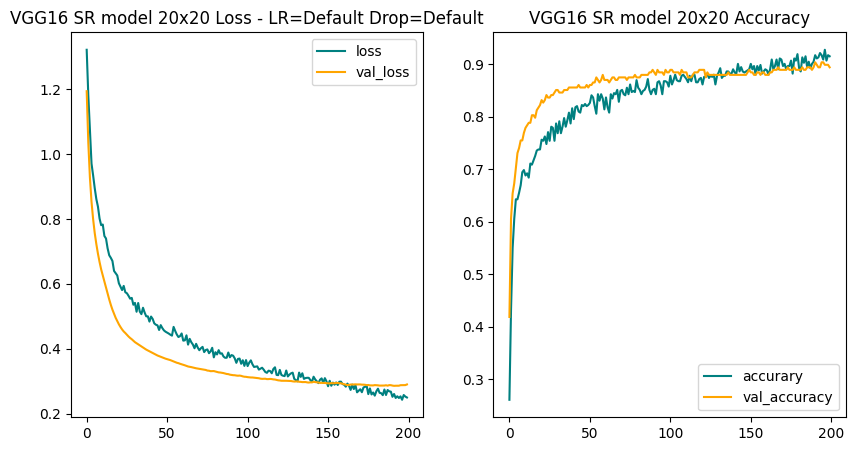

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_VGG16_20by20_SR.history['loss'], color='teal', label='loss')
ax[0].plot(hist_VGG16_20by20_SR.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('VGG16 SR model 20x20 Loss - LR=Default Drop=Default')
ax[0].legend(loc="upper right")
#ax[0].set_ylim([0, 1])

ax[1].plot(hist_VGG16_20by20_SR.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_VGG16_20by20_SR.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('VGG16 SR model 20x20 Accuracy')
ax[1].legend(loc="lower right")
#ax[1].set_ylim([0.5, 1])

In [25]:
VGG16_model_20by20.save(os.path.join(data_dir,'imageclassifier_3classes_VGG16_20x20_200epoch_SR.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
hist_ENV2S_20by20_SR = ENV2S_model_20by20.fit(x_train_SR,y_train_SR, epochs=200, validation_data=(x_val_SR, y_val_SR), callbacks=[tensorboard_callback])

Epoch 1/200
16/16 [==============================] - 20s 363ms/step - loss: 1.1512 - accuracy: 0.5558 - val_loss: 1.0179 - val_accuracy: 0.6010
Epoch 2/200
16/16 [==============================] - 1s 63ms/step - loss: 1.0045 - accuracy: 0.5558 - val_loss: 0.9048 - val_accuracy: 0.6010
Epoch 3/200
16/16 [==============================] - 1s 62ms/step - loss: 0.9142 - accuracy: 0.5558 - val_loss: 0.8251 - val_accuracy: 0.6010
Epoch 4/200
16/16 [==============================] - 1s 63ms/step - loss: 0.8533 - accuracy: 0.5558 - val_loss: 0.7780 - val_accuracy: 0.6010
Epoch 5/200
16/16 [==============================] - 1s 66ms/step - loss: 0.8144 - accuracy: 0.5682 - val_loss: 0.7404 - val_accuracy: 0.6394
Epoch 6/200
16/16 [==============================] - 1s 70ms/step - loss: 0.7794 - accuracy: 0.6157 - val_loss: 0.7117 - val_accuracy: 0.6779
Epoch 7/200
16/16 [==============================] - 1s 69ms/step - loss: 0.7555 - accuracy: 0.6653 - val_loss: 0.6881 - val_accuracy: 0.7308
Epoc

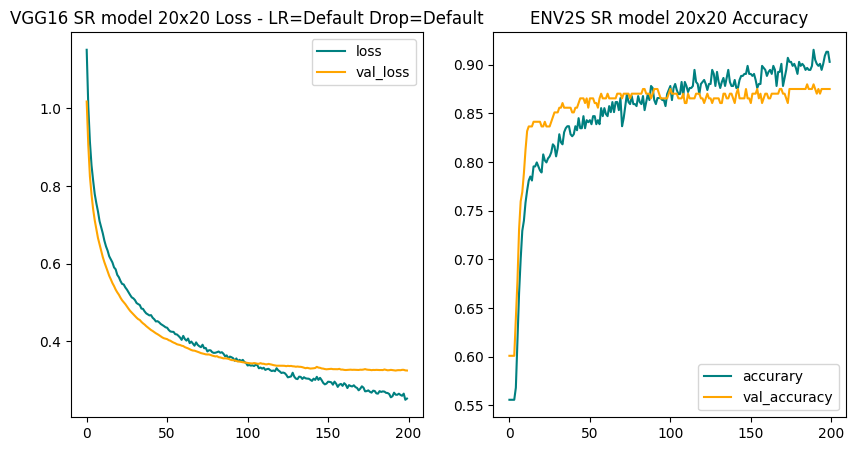

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_ENV2S_20by20_SR.history['loss'], color='teal', label='loss')
ax[0].plot(hist_ENV2S_20by20_SR.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('VGG16 SR model 20x20 Loss - LR=Default Drop=Default')
ax[0].legend(loc="upper right")
#ax[0].set_ylim([0, 1])

ax[1].plot(hist_ENV2S_20by20_SR.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_ENV2S_20by20_SR.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('ENV2S SR model 20x20 Accuracy')
ax[1].legend(loc="lower right")
#ax[1].set_ylim([0.5, 1])

In [26]:
ENV2S_model_20by20.save(os.path.join(data_dir,'imageclassifier_3classes_ENV2S_20x20_200epoch_SR.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
DenseNet121_model_20by20.save(os.path.join(data_dir,'imageclassifier_3classes_DenseNet121_20x20_200epoch_SR.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
hist_DenseNet121_20by20_SR_2 = DenseNet121_model_20by20_SR.fit(x_train_SR,y_train_SR, epochs=120, validation_data=(x_val_SR, y_val_SR), callbacks=[tensorboard_callback])

Epoch 1/120
16/16 [==============================] - 10s 249ms/step - loss: 1.0121 - accuracy: 0.4876 - val_loss: 0.7714 - val_accuracy: 0.6154
Epoch 2/120
16/16 [==============================] - 1s 49ms/step - loss: 0.7765 - accuracy: 0.6529 - val_loss: 0.6338 - val_accuracy: 0.8125
Epoch 3/120
16/16 [==============================] - 1s 49ms/step - loss: 0.6582 - accuracy: 0.7500 - val_loss: 0.5588 - val_accuracy: 0.8173
Epoch 4/120
16/16 [==============================] - 1s 49ms/step - loss: 0.6107 - accuracy: 0.7851 - val_loss: 0.5385 - val_accuracy: 0.8125
Epoch 5/120
16/16 [==============================] - 1s 41ms/step - loss: 0.5836 - accuracy: 0.7955 - val_loss: 0.5192 - val_accuracy: 0.8125
Epoch 6/120
16/16 [==============================] - 1s 39ms/step - loss: 0.5706 - accuracy: 0.7913 - val_loss: 0.4974 - val_accuracy: 0.8077
Epoch 7/120
16/16 [==============================] - 1s 49ms/step - loss: 0.5402 - accuracy: 0.8182 - val_loss: 0.4730 - val_accuracy: 0.8221
Epoc

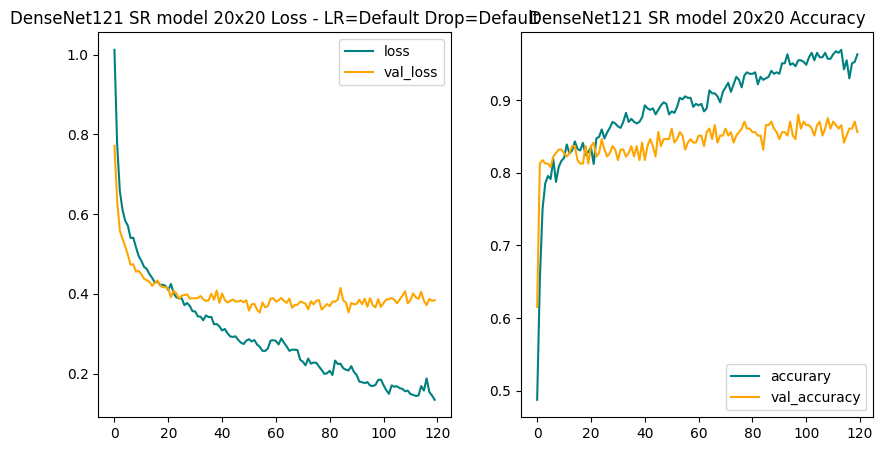

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_DenseNet121_20by20_SR_2.history['loss'], color='teal', label='loss')
ax[0].plot(hist_DenseNet121_20by20_SR_2.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('DenseNet121 SR model 20x20 Loss - LR=Default Drop=Default')
ax[0].legend(loc="upper right")
#ax[0].set_ylim([0, 1])

ax[1].plot(hist_DenseNet121_20by20_SR_2.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_DenseNet121_20by20_SR_2.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('DenseNet121 SR model 20x20 Accuracy')
ax[1].legend(loc="lower right")
#ax[1].set_ylim([0.5, 1])